In [72]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# Echemos un vistazo preliminar al fichero
!cat "Ficheros/Manchas/SN_d_tot_V2.0.csv" | head

1818;01;01;1818.001;  -1; -1.0;   0;1
1818;01;02;1818.004;  -1; -1.0;   0;1
1818;01;03;1818.007;  -1; -1.0;   0;1
1818;01;04;1818.010;  -1; -1.0;   0;1
1818;01;05;1818.012;  -1; -1.0;   0;1
1818;01;06;1818.015;  -1; -1.0;   0;1
1818;01;07;1818.018;  -1; -1.0;   0;1
1818;01;08;1818.021;  65; 10.2;   1;1
1818;01;09;1818.023;  -1; -1.0;   0;1
1818;01;10;1818.026;  -1; -1.0;   0;1
cat: write error: Broken pipe


In [7]:
# Con la descripción de los datos que tenemos (ver "SN_d_tot_V2.0_description.txt") y 
# sabiendo que los NaN se coresponden con el valor -1 podemos ya cargarlo:
columnas = ['Year', 'Month', 'Day', 'Fraction', 'Spots', 'Stdev', 'Observ', 'Def/Prov']
df = pd.read_csv('Ficheros/Manchas/SN_d_tot_V2.0.csv', sep = ';', header = None, names = columnas, na_values = [0, -1])
df.head(10)

,Year,Month,Day,Fraction,Spots,Stdev,Observ,Def/Prov
0,1818,1,1,1818.001,-1,NaN,0,1.0
1,1818,1,2,1818.004,-1,NaN,0,1.0
2,1818,1,3,1818.007,-1,NaN,0,1.0
3,1818,1,4,1818.010,-1,NaN,0,1.0
4,1818,1,5,1818.012,-1,NaN,0,1.0
5,1818,1,6,1818.015,-1,NaN,0,1.0
6,1818,1,7,1818.018,-1,NaN,0,1.0
7,1818,1,8,1818.021,65,10.2,1,1.0
8,1818,1,9,1818.023,-1,NaN,0,1.0
9,1818,1,10,1818.026,-1,NaN,0,1.0


In [42]:
# No parece que nos haya transformado en NaN los datos de 'Spots', debe haber espacios en esa columna
columnas = ['Year', 'Month', 'Day', 'Fraction', 'Spots', 'Stdev', 'Observ', 'Def/Prov']
df = pd.read_csv('Ficheros/Manchas/SN_d_tot_V2.0.csv', sep = r'\s*;\s*', header = None, names = columnas, na_values =[0, -1],
                engine = 'python')
df.head(10)

,Year,Month,Day,Fraction,Spots,Stdev,Observ,Def/Prov
0,1818,1,1,1818.001,NaN,NaN,NaN,1.0
1,1818,1,2,1818.004,NaN,NaN,NaN,1.0
2,1818,1,3,1818.007,NaN,NaN,NaN,1.0
3,1818,1,4,1818.010,NaN,NaN,NaN,1.0
4,1818,1,5,1818.012,NaN,NaN,NaN,1.0
5,1818,1,6,1818.015,NaN,NaN,NaN,1.0
6,1818,1,7,1818.018,NaN,NaN,NaN,1.0
7,1818,1,8,1818.021,65.0,10.2,1.0,1.0
8,1818,1,9,1818.023,NaN,NaN,NaN,1.0
9,1818,1,10,1818.026,NaN,NaN,NaN,1.0


In [43]:
df

,Year,Month,Day,Fraction,Spots,Stdev,Observ,Def/Prov
0,1818,1,1,1818.001,NaN,NaN,NaN,1.0
1,1818,1,2,1818.004,NaN,NaN,NaN,1.0
2,1818,1,3,1818.007,NaN,NaN,NaN,1.0
3,1818,1,4,1818.010,NaN,NaN,NaN,1.0
4,1818,1,5,1818.012,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
73834,2020,2,25,2020.152,NaN,NaN,25.0,NaN
73835,2020,2,26,2020.154,NaN,NaN,30.0,NaN
73836,2020,2,27,2020.157,NaN,NaN,28.0,NaN
73837,2020,2,28,2020.160,NaN,NaN,32.0,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22637 entries, 48212 to 73810
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      22637 non-null  int64         
 1   Month     22637 non-null  int64         
 2   Day       22637 non-null  int64         
 3   Fraction  22637 non-null  float64       
 4   Spots     22637 non-null  float64       
 5   Stdev     22632 non-null  float64       
 6   Observ    22637 non-null  float64       
 7   Def/Prov  22609 non-null  float64       
 8   Date      22637 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 1.7 MB


In [45]:
# Vemos el número de NaN y hasta donde llegan
df.isna().sum()


Year            0
Month           0
Day             0
Fraction        0
Spots       14443
Stdev        5864
Observ       3247
Def/Prov      152
dtype: int64

In [46]:
df[df.isnull().any(1)]

,Year,Month,Day,Fraction,Spots,Stdev,Observ,Def/Prov
0,1818,1,1,1818.001,NaN,NaN,NaN,1.0
1,1818,1,2,1818.004,NaN,NaN,NaN,1.0
2,1818,1,3,1818.007,NaN,NaN,NaN,1.0
3,1818,1,4,1818.010,NaN,NaN,NaN,1.0
4,1818,1,5,1818.012,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
73834,2020,2,25,2020.152,NaN,NaN,25.0,NaN
73835,2020,2,26,2020.154,NaN,NaN,30.0,NaN
73836,2020,2,27,2020.157,NaN,NaN,28.0,NaN
73837,2020,2,28,2020.160,NaN,NaN,32.0,NaN


In [47]:
# Eliminamos filas con NaN en la columna 'Spots'
df = df.dropna(axis=0, subset=['Spots'])

In [48]:
# Eliminamos filas < 1950
df.drop(df[df.Year < 1950].index, inplace =True)

/home/jmpinop/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
# Crearemos una columna en formato fecha para operaciones posteriores
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

/home/jmpinop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
df.describe()

,Year,Month,Day,Fraction,Spots,Stdev,Observ,Def/Prov
count,22637.000000,22637.000000,22637.000000,22637.000000,22637.000000,22632.000000,22637.000000,22609.0
mean,1983.532005,6.506781,15.707338,1984.030587,103.553519,6.517727,10.333790,1.0
std,19.624087,3.442137,8.789286,19.622559,80.789793,3.644124,9.857018,0.0
min,1950.000000,1.000000,1.000000,1950.001000,1.000000,0.200000,1.000000,1.0
25%,1967.000000,4.000000,8.000000,1967.338000,36.000000,3.800000,1.000000,1.0
50%,1983.000000,7.000000,16.000000,1983.577000,85.000000,6.100000,10.000000,1.0
75%,2000.000000,9.000000,23.000000,2000.663000,153.000000,8.700000,18.000000,1.0
max,2020.000000,12.000000,31.000000,2020.086000,503.000000,77.700000,58.000000,1.0


In [58]:
# Tomaremos como outlier la media + 3Stdev (~350)
df[df['Spots']>350]

,Year,Month,Day,Fraction,Spots,Stdev,Observ,Def/Prov,Date


In [57]:
# Los borramos
df.drop(df[df.Spots > 350].index, inplace =True)

/home/jmpinop/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
# Solo nos interesan la nueva columna de fecha y el número de manchas (Spots). Eliminamos el resto
df.drop(['Year', 'Month', 'Day', 'Fraction', 'Stdev', 'Observ', 'Def/Prov'], axis = 'columns', inplace = True)

/home/jmpinop/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
# Listo! Lo guardamos para más tarde
df.to_csv('Spots_new.csv', index = False)

In [61]:
(df['Spots']==0).sum()

0

In [62]:
df

,Spots,Date
48212,143.0,1950-01-01
48213,142.0,1950-01-02
48214,130.0,1950-01-03
48215,119.0,1950-01-04
48216,108.0,1950-01-05
...,...,...
73806,12.0,2020-01-28
73807,12.0,2020-01-29
73808,12.0,2020-01-30
73809,12.0,2020-01-31


In [63]:
df = df[['Date', 'Spots']]

In [64]:
df

,Date,Spots
48212,1950-01-01,143.0
48213,1950-01-02,142.0
48214,1950-01-03,130.0
48215,1950-01-04,119.0
48216,1950-01-05,108.0
...,...,...
73806,2020-01-28,12.0
73807,2020-01-29,12.0
73808,2020-01-30,12.0
73809,2020-01-31,12.0


In [65]:
df.describe()

,Spots
count,22474.000000
mean,101.529501
std,77.444097
min,1.000000
25%,36.000000
50%,84.000000
75%,151.000000
max,350.000000


In [1]:
len(df['Spots]']>300)


NameError: name 'df' is not defined

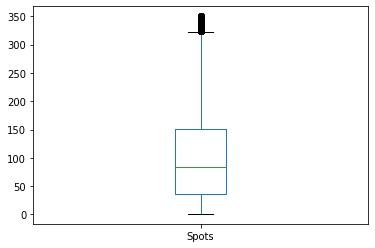

In [67]:
df.plot.box()

In [68]:
# Listo! Lo guardamos para más tarde
df.to_csv('Spots_new.csv', index = False)